<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.501 · Fundamentos de Programación</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Fundamentos de Programación
============================

--- 

Unidad 4: Librerías científicas en Python - SciPy
-----------------------------------------------------

---

### Instrucciones de uso

Este documento es un *notebook* interactivo que intercala explicaciones más bien teóricas de conceptos de programación con fragmentos de código ejecutables. Para aprovechar las ventajas que aporta este formato, se recomienda, en primer lugar, leer las explicaciones y el código que os proporcionamos. De esta manera tendréis un primer contacto con los conceptos que exponemos. Ahora bien, **¡la lectura es sólo el principio!** Una vez hayáis leído el contenido, no olvidéis ejecutar el código proporcionado y modificarlo para crear variantes que os permitan comprobar que habéis entendido su funcionalidad y explorar los detalles de implementación. Por último, se recomienda también consultar la documentación enlazada para explorar con más profundidad las funcionalidades de los módulos presentados.

### Introducción

A continuación se presentarán explicaciones y ejemplos de uso de la
librería SciPy. Recordad que podéis ir ejecutando los ejemplos para
obtener los resultados.

A continuación se incluye la tabla de contenidos, que podéis utilizar para navegar por el documento:

<ul style="list-style-type:none">
    <li><a href='#1.-Introducción'>1. Introducción</a></li>
    <li><a href="#2.-Recopilación-de-ejemplos">2. Recopilación de ejemplos</a></li>
    <ul style="list-style-type:none">
        <li><a href="#2.1.-Ejemplo-1:-Simulación-de-una-apocalipsis-Zombie"> 2.1. Ejemplo 1: Simulación de una apocalipsis Zombie</a></li>
        <li><a href="#2.2.-Ejemplo-2:-Buscando-cristales-de-proteínas">2.2. Ejemplo 2: Buscando cristales de proteínas</a></li>
    </ul>
    <li> <a href="#3.-Ejercicios-y-preguntas-teóricas"> 3. Ejercicios y preguntas teóricas </a> </li>
    <ul style = "list-style-type: none">
        <li> <a href="#3.1.-Instrucciones-importantes"> 3.1 Instrucciones importantes </a> </li>
        <li> <a href="#3.2-Solución"> 3.2 Solución </a> </li>
    </ul>
    <li> <a href="#4.-Bibliografía"> 4. Bibliografía </a> </li>
</ul>

# 1. Introducción

[SciPy](http://www.scipy.org/) es una librería muy importante para la comunidad científica en Python. Como apuntábamos antes, ha ido incluyendo poco a poco otros paquetes importantes como NumPy, [SymPy](http://www.sympy.org/en/index.html), [Matplotlib](http://matplotlib.org/) o el propio IPython en lo que se conoce como SciPy stack, o la pila de desarrollo de herramientas científicas en Python. La clara ventaja de integrar los diferentes paquetes en una librería es diseñar una interfaz común que permita la comunicación entre distintas librerías de desarrollo. Por ejemplo, imaginemos que queremos representar datos de forma matricial (usaremos NumPy para ello), que queremos calcular distancias (usaremos algoritmos incluidos en SciPy) y finalmente queremos representar esos resultados (Matplotlib fue diseñado para ello). Con tan solo tres líneas al principio de nuestro código, tendremos toda la potencia de estas librerías y los datos que manejen serán compatibles entre ellas.

Por último, el paquete principal de SciPy es la [SciPy library](http://www.scipy.org/scipylib/index.html).

# 2. Recopilación de ejemplos

## 2.1. Ejemplo 1: Simulación de una apocalipsis Zombie

[Munz y otros en 2009](http://mysite.science.uottawa.ca/rsmith43/Zombies.pdf) definieron un modelo de invasión zombie mediante un sistema de ecuaciones diferenciales ordinarias:

* _dS/dt = P - B\*S\*Z - d\*S_
* _dZ/dt = B\*S\*Z + G\*R - A\*S\*Z_
* _dR/dt = d\*S + A\*S\*Z - G\*R_

Donde:

    S: el número de víctimas
    Z: el número de zombies
    R: el número de gente asesinada por los zombies
    P: el ratio de nacimientos
    d: la probabilidad de muerte natural
    B: la probabilidad de propagación de la enfermedad zombie (personas vivas y sanas)
    G: la probabilidad de que una persona muerta vuelva a la vida como zombie
    A: la probabilidad de que un zombie sea aniquilado completamente

Scipy puede resolver sistemas de primer orden de ecuaciones diferenciales de forma sencilla. Nos centraremos en resolver la expresión:
_dy/dt = f(y, t)_ donde _y = [S, Z, R]_.


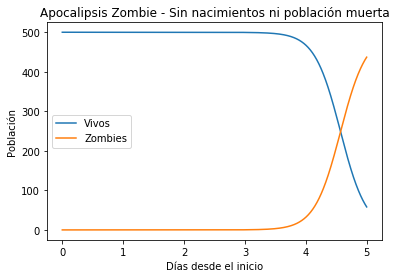

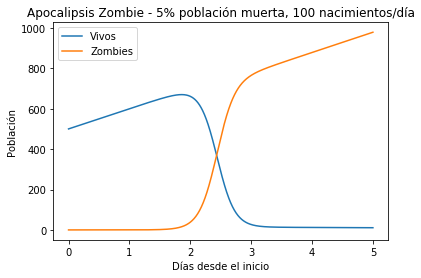

In [3]:
%matplotlib inline

# Fuente código: http://wiki.scipy.org/Cookbook/Zombie_Apocalypse_ODEINT

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

P = 0       # Ratio de nacimientos
d = 0.0001  # Porcentaje de muertes naturales (por día)
B = 0.0095  # Porcentaje de transmisión  (por día)
G = 0.0001  # Porcentaje de resurrecciones (por día)
A = 0.0001  # Porcentaje de destrucción  (por día)

# resuelve el sistema dy/dt = f(y, t)
def f(y, t):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    # El modelo de Munz et al. 2009
    f0 = P - B*Si*Zi - d*Si
    f1 = B*Si*Zi + G*Ri - A*Si*Zi
    f2 = d*Si + A*Si*Zi - G*Ri
    return [f0, f1, f2]

# Condiciones iniciales
S0 = 500.               # población inicial
Z0 = 0                  # población inicial zombie
R0 = 0                  # población inicial muerta
y0 = [S0, Z0, R0]       # condiciones iniciales expresadas como un vector
t  = np.linspace(0, 5., 1000)   # vector de tiempo (pasos de simulación)

# resolvemos el sistema
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Representamos los resultados
plt.figure()
plt.plot(t, S, label='Vivos')
plt.plot(t, Z, label='Zombies')
plt.xlabel(u'Días desde el inicio')
plt.ylabel(u'Población')
plt.title(u'Apocalipsis Zombie - Sin nacimientos ni población muerta')
plt.legend(loc=0)

# cambiamos las condiciones iniciales
R0 = 0.05*S0   # 5% de la población inicial está muerta
P  = 100       # 100 nuevos nacimientos por día
y0 = [S0, Z0, R0]

# volvemos a resolver el sistema
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Vivos')
plt.plot(t, Z, label='Zombies')
plt.xlabel(u'Días desde el inicio')
plt.ylabel(u'Población')
plt.title(u'Apocalipsis Zombie - 5% población muerta, 100 nacimientos/día')
plt.legend(loc=0)
pass

## 2.2. Ejemplo 2: Buscando cristales de proteínas

La criomicroscopía electrónica es una técnica de microscopía muy utilizada en biología estructural en la que la muestra que hay que estudiar se encuentra a temperaturas criogénicas. La siguiente imagen es una solución de la proteína GroEL (Fuente: Wikipedia - "Cryoem groel", Vossman):

<img src="files/media/Cryoem_groel.png">

Vamos a escribir un código que nos permita contar el número de cristales de GroEL en la imagen:

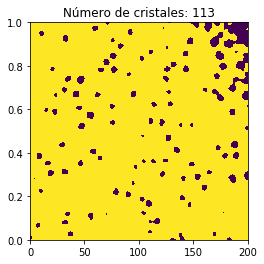

In [4]:
%matplotlib inline

import numpy as np
from scipy import ndimage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Leemos la imagen original.
im = mpimg.imread('media/Cryoem_groel.png')
# Hacemos una copia que utilizaremos para manipular.
image = im.copy()

# Aplicamos un filtro gaussiano con tamaño de kernel 3.
im_g = ndimage.gaussian_filter(image, 3)
# Normalizamos.
im_norm = (im_g - im_g.min()) / (float(im_g.max()) - im_g.min())
im_norm[im_norm < 0.5] = 0
im_norm[im_norm >= 0.5] = 1

# Convertimos la imagen resultado para utilizar la función de etiquetado de scipy.
result = 255 - (im_norm * 255).astype(np.uint8)

# Identificamos el número de cristales y los mostramos.
plt.title(u"Número de cristales: %d" % ndimage.label(result)[1])
img = plt.imshow(np.asarray(im_norm), interpolation='nearest', extent=[0,200,0,1], aspect=200)
plt.show()

Este código no es perfecto puesto que no estamos teniendo en cuenta el artefacto de la esquina superior derecha, pero nos da una idea de cómo aplicar diferentes filtros utilizados en visión por computador en *scripts* de muy pocas líneas gracias a Scipy.

# 3. Ejercicios y preguntas teóricas

La parte evaluable de esta unidad consiste en la entrega de un fichero Notebook con extensión «.ipynb» que contendrá los diferentes ejercicios y las preguntas teóricas que hay que contestar. Encontraréis el archivo (`prog_datasci_4_scilib_entrega.ipynb`) con las actividades en la misma carpeta que este notebook que estáis leyendo. **Hay un solo archivo de actividades para toda la unidad, que cubre todas las librerías que se trabajan.**

## 3.1. Instrucciones importantes

Es muy importante que a la hora de entregar el archivo Notebook con vuestras actividades os aseguréis de que:

1. Vuestras soluciones sean originales. Esperamos no detectar copia directa entre estudiantes.
2. Todo el código esté correctamente documentado. El código sin documentar equivaldrá a un 0.
3. El archivo comprimido que entreguéis es correcto (contiene las actividades de la PEC que queréis entregar).

Para hacer la entrega, comprimid el archivo `prog_datasci_4_scilib_entrega.ipynb` desde la terminal de la máquina virtual (utilizad vuestro nombre y apellido) y subid el archivo `nombre_apellido_pec4.tgz` al campus virtual:

```
$ cd /home/datasci/prog_datasci_1/prog_datasci_4
$ tar zcvf nombre_apellido_pec4.tgz prog_datasci_4_scilib_entrega.ipynb
```

## 3.2 Solución

Para descargar la solución de la actividad (a partir de la fecha indicada en el aula), desde la máquina virtual, abrid una terminal y ejecutad el script `get_sol_pec.sh`:

```
datasci@datasci:~$ get_sol_pec.sh 
Please type the number of the activity you want to download: 4
Please select the language you want to use: type 0 for Catalan, 1 for Spanish 1
Downloading PEC 4 in SPANISH
Cloning into 'prog_datasci_sol_4'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 26 (delta 9), reused 0 (delta 0)
Unpacking objects: 100% (26/26), done.
OK! Files downloaded in /home/datasci/prog_datasci_1/prog_datasci_sol_4
```

Una vez descargada la solución, podéis ejecutar el servidor como ya explicamos (mediante el script `start_uoc.sh`) y acceder a su contenido.

# 4. Bibliografía

